In [26]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

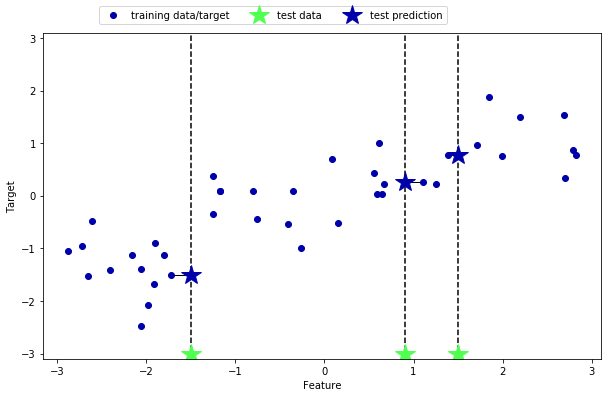

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

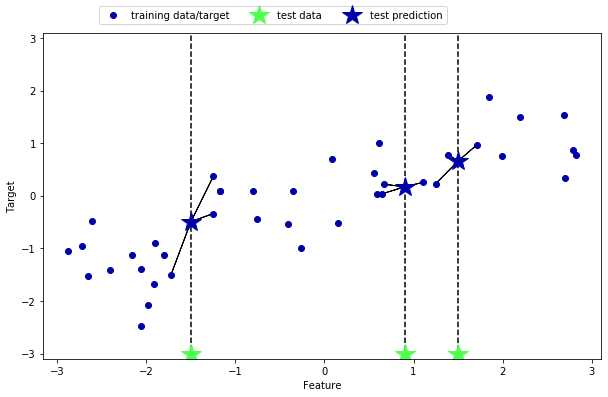

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
#模型实例化
reg = KNeighborsRegressor(n_neighbors=3)
#fit model
reg.fit(X_train, y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [7]:
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.83


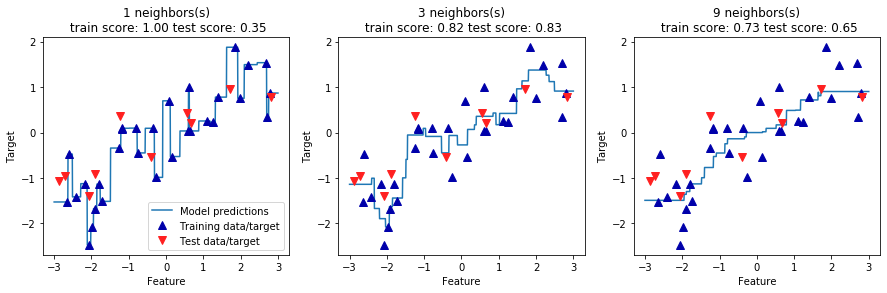

In [9]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
#创建1000个数据点
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    #利用1个，3,9个邻居分别预测
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title(
        "{} neighbors(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors,reg.score(X_train,y_train),
            reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
               "Test data/target"],loc="best")

w[0]: 0.393906  b: -0.031804


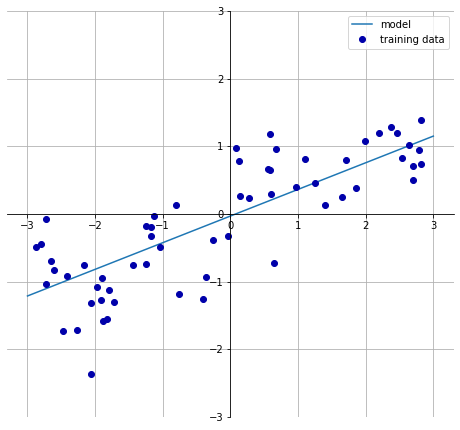

In [10]:
mglearn.plots.plot_linear_regression_wave()

In [11]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)
#coef=k, intercept=b
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.03180434302675973


In [12]:
print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

Training set score:0.67
Test set score:0.66


In [13]:
#训练集和测试集之间的性能差异是过拟合的重要标志
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)
print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

Training set score:0.95
Test set score:0.61


In [14]:
#正则化对模型做显式约束
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test,y_test)))

Training set score:0.89
Test set score:0.75


In [15]:
#默认alpha为1，约束较强，复杂度较小，训练集上性能较差，泛化性能较好
#增大alpha会使系数更趋向0，降低训练集性能。但可能会提高泛化性能
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test,y_test)))

Training set score:0.79
Test set score:0.64


In [16]:
#减少alpha使系数受限制更小，训练集模型复杂度提升，泛化性能较差
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test,y_test)))

Training set score:0.93
Test set score:0.77


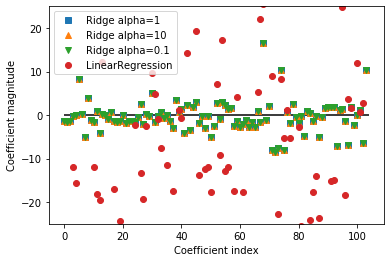

In [18]:
#岭回归惩罚了系数的L2范数，w的欧氏距离
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

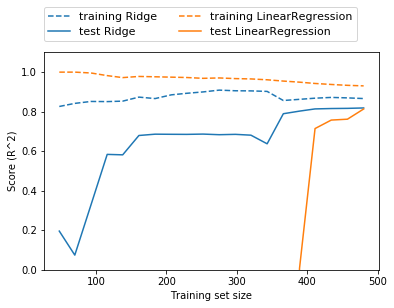

In [19]:
#如果有足够的数据，正则化变得并不重要，岭回归和线性回归性能将一致
mglearn.plots.plot_ridge_n_samples()

In [20]:
#使用lasso某些系数为0被模型忽略，便于解释，理解模型最重要的特征
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test,y_test)))
print("number of feature used:{}".format(np.sum(lasso.coef_ !=0)))

Training set score:0.29
Test set score:0.21
number of feature used:4


In [21]:
#存在欠拟合
#增大max_iter的值
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test,y_test)))
print("number of feature used:{}".format(np.sum(lasso001.coef_ !=0)))

Training set score:0.90
Test set score:0.77
number of feature used:33


In [22]:
#如果把alpha设的太小，会消除正则化效果，出现过拟合（模型复杂度上升，泛化较差）
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso00001.score(X_test,y_test)))
print("number of feature used:{}".format(np.sum(lasso00001.coef_ !=0)))

Training set score:0.95
Test set score:0.64
number of feature used:96


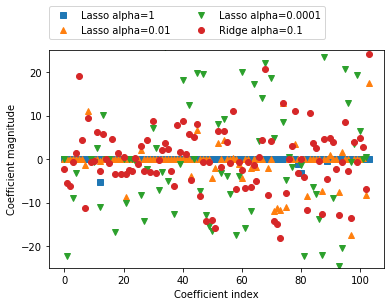

In [23]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-25,25)
plt.legend(ncol=2,loc=(0,1.05))

E:\conda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


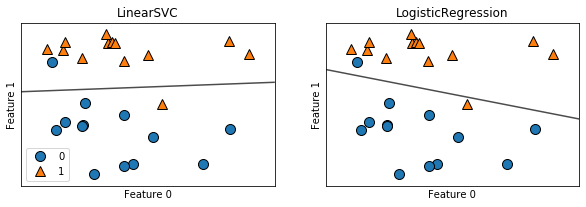

In [31]:
#实践中两个模型一般首选岭回归，如果特征较多，但只有几个重要的可以选lasso
#线性模型也可以用来分类
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model ,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,
                                   ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

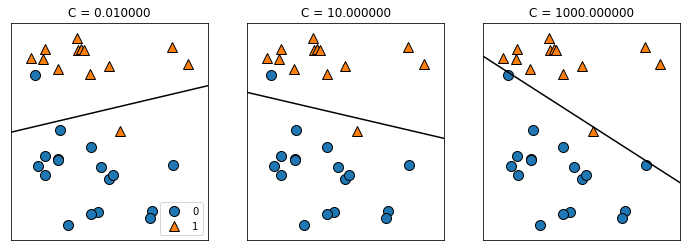

In [32]:
#默认使用l2正则化，决策边界都是直线，直接分类
mglearn.plots.plot_linear_svc_regularization()

In [37]:
#线性分类器参数为C，越大模型拟合训练集越好，正则化越弱，越小系数向量越接近于0
#较小的C可以让算法尽量适应大多数数据点，较大的强调每个数据点都分类正确重要性
#低维空间受限，高维空间效果好，尽量避免过拟合，如图3
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg = LogisticRegression(max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test,y_test)))

Training set score:0.958
Test set score:0.958


In [36]:
#由于过于接近而可能欠拟合
logreg100=LogisticRegression(C=100,max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test,y_test)))

Training set score:0.984
Test set score:0.965


In [38]:
logreg001=LogisticRegression(C=0.01,max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test,y_test)))

Training set score:0.953
Test set score:0.951


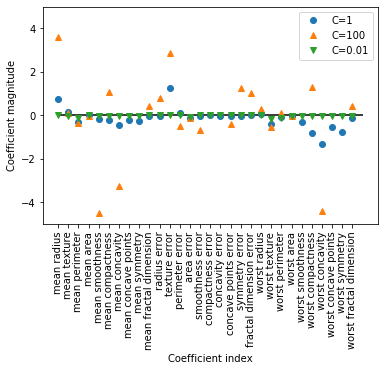

In [40]:
#不同c值的logistic回归在数据集上学习到的系数
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

#对线性模型系数的解释应始终保持保留态度

Training accuracy of l1 logreg with C=0.001:0.91
Test accuracy of l1 logreg with C=0.001:0.92
Training accuracy of l1 logreg with C=1.000:0.96
Test accuracy of l1 logreg with C=1.000:0.96
Training accuracy of l1 logreg with C=100.000:0.99
Test accuracy of l1 logreg with C=100.000:0.98


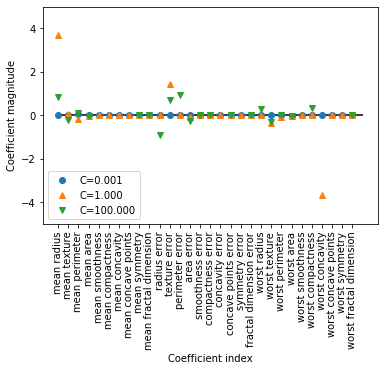

In [46]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C,penalty="l1",solver='liblinear',max_iter=100000).fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C={:.3f}:{:.2f}".format(
        C,lr_l1.score(X_train,y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}:{:.2f}".format(
        C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5,5)
plt.legend(loc=3)
    
